# Temperature Forecast Project using ML
## Project Description
### This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

## Attribute Information:
.
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/sneha/Downloads/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
df.shape

(7752, 25)

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df[df.duplicated()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


In [10]:
## Since, we have more than 5000 datas in dataset , we can drop the null values.  

In [10]:
df = df.dropna()
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

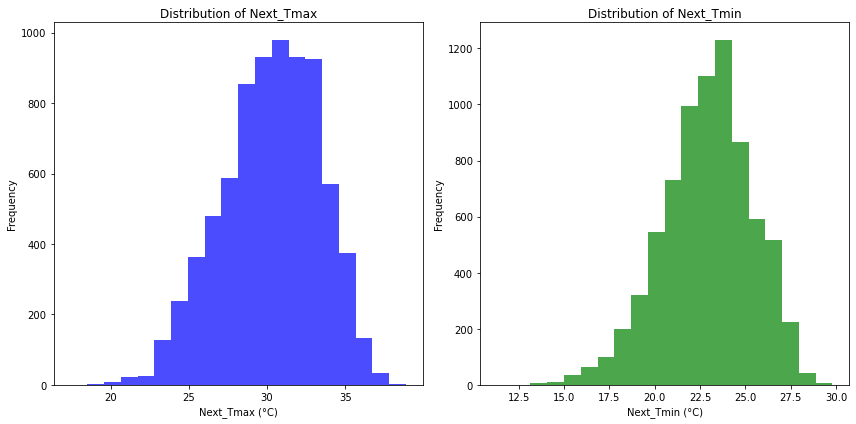

In [19]:
import matplotlib.pyplot as plt

# Create histograms for 'Next_Tmax' and 'Next_Tmin'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Next_Tmax'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Next_Tmax')
plt.xlabel('Next_Tmax (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Next_Tmin'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Next_Tmin')
plt.xlabel('Next_Tmin (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


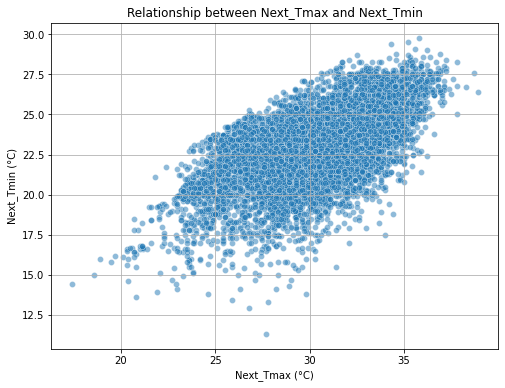

In [20]:
import seaborn as sns

# Create a scatter plot for 'Next_Tmax' vs 'Next_Tmin'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Next_Tmax', y='Next_Tmin', alpha=0.5)
plt.title('Relationship between Next_Tmax and Next_Tmin')
plt.xlabel('Next_Tmax (°C)')
plt.ylabel('Next_Tmin (°C)')
plt.grid(True)
plt.show()

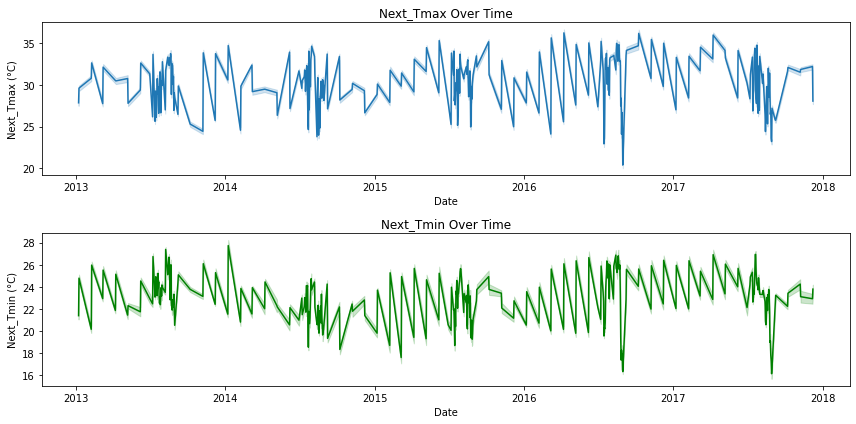

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'Date', 'Next_Tmax', and 'Next_Tmin' columns
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format

# Create line plots for 'Date' vs 'Next_Tmax' and 'Date' vs 'Next_Tmin'
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='Date', y='Next_Tmax')
plt.title('Next_Tmax Over Time')
plt.xlabel('Date')
plt.ylabel('Next_Tmax (°C)')

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='Date', y='Next_Tmin', color='green')
plt.title('Next_Tmin Over Time')
plt.xlabel('Date')
plt.ylabel('Next_Tmin (°C)')

plt.tight_layout()
plt.show()


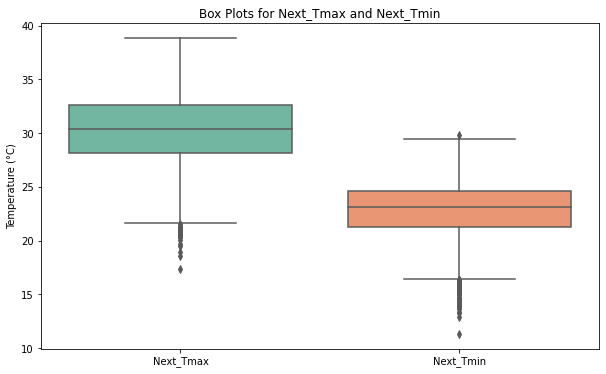

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for 'Next_Tmax' and 'Next_Tmin'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Next_Tmax', 'Next_Tmin']], orient='vertical', palette='Set2')
plt.title('Box Plots for Next_Tmax and Next_Tmin')
plt.ylabel('Temperature (°C)')
plt.show()


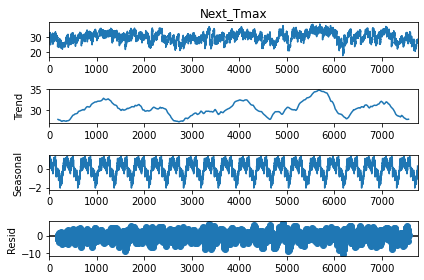

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series for 'Next_Tmax' or 'Next_Tmin'
result = seasonal_decompose(df['Next_Tmax'], model='additive', period=365)
result.plot()
plt.show()


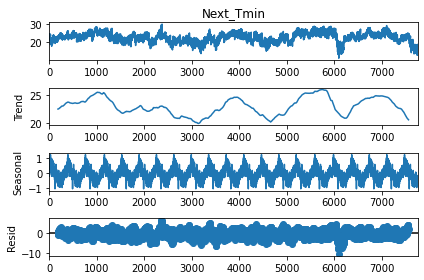

In [26]:
seasonal_decompose(df['Next_Tmin'], model='additive', period=365).plot()
plt.show()

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

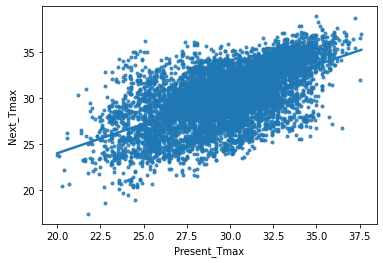

In [28]:
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='.')

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

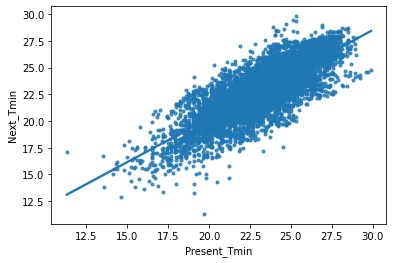

In [29]:
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='.')

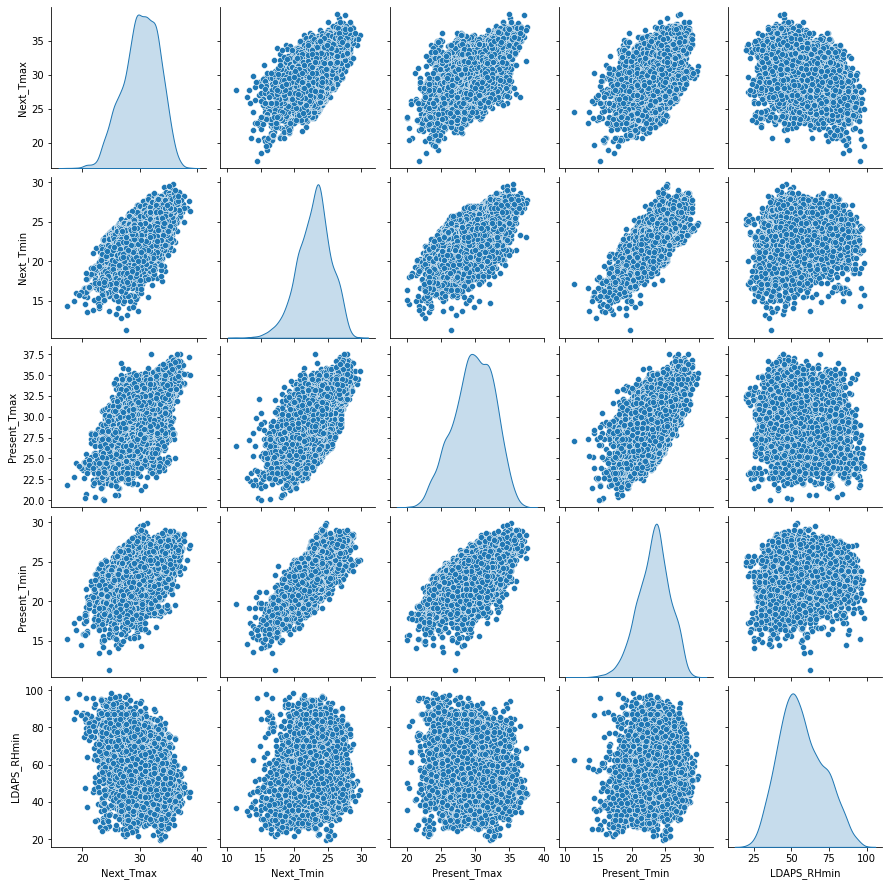

In [31]:
columns_to_plot = ['Next_Tmax', 'Next_Tmin', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin']
sns.pairplot(df[columns_to_plot], diag_kind='kde')
plt.show()

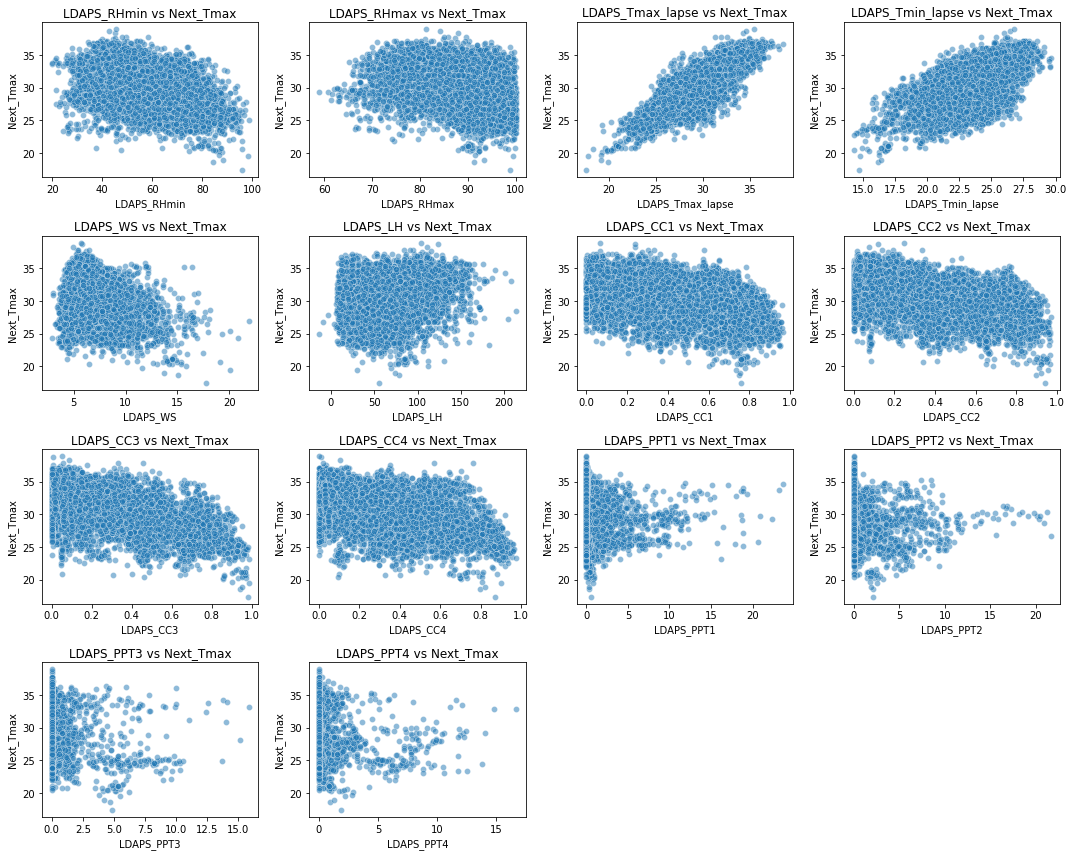

In [38]:


# Select LDAPS variables and Next_Tmax
ldaps_variables = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                   'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
target_variable = 'Next_Tmax'

# Create scatter plots for LDAPS variables vs Next_Tmax
plt.figure(figsize=(15, 12))
for i, ldaps_var in enumerate(ldaps_variables):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df, x=ldaps_var, y=target_variable, alpha=0.5)
    plt.title(f'{ldaps_var} vs {target_variable}')
    plt.xlabel(ldaps_var)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()


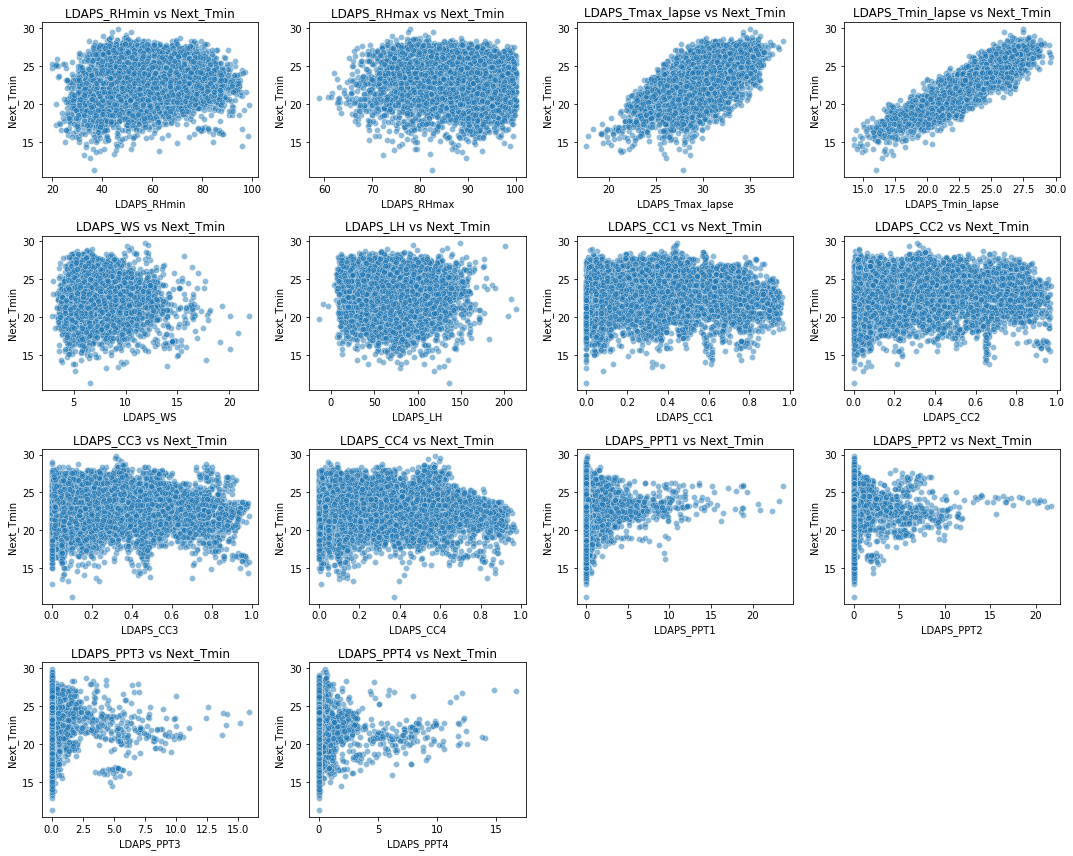

In [39]:

# Select LDAPS variables and Next_Tmax
ldaps_variables = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                   'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
target_variable = 'Next_Tmin'

# Create scatter plots for LDAPS variables vs Next_Tmax
plt.figure(figsize=(15, 12))
for i, ldaps_var in enumerate(ldaps_variables):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df, x=ldaps_var, y=target_variable, alpha=0.5)
    plt.title(f'{ldaps_var} vs {target_variable}')
    plt.xlabel(ldaps_var)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()


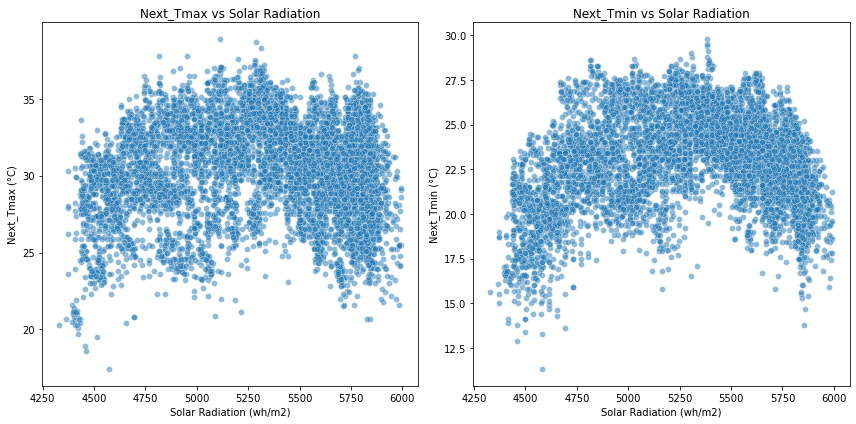

In [33]:

# Create scatter plots for 'Next_Tmax' vs 'Solar radiation' and 'Next_Tmin' vs 'Solar radiation'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Solar radiation', y='Next_Tmax', alpha=0.5)
plt.title('Next_Tmax vs Solar Radiation')
plt.xlabel('Solar Radiation (wh/m2)')
plt.ylabel('Next_Tmax (°C)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Solar radiation', y='Next_Tmin', alpha=0.5)
plt.title('Next_Tmin vs Solar Radiation')
plt.xlabel('Solar Radiation (wh/m2)')
plt.ylabel('Next_Tmin (°C)')

plt.tight_layout()
plt.show()


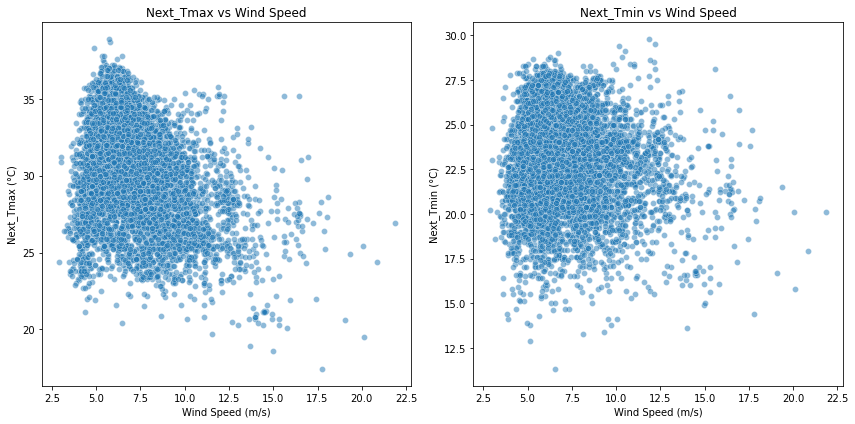

In [34]:

# Create scatter plots for 'Next_Tmax' vs 'LDAPS_WS' and 'Next_Tmin' vs 'LDAPS_WS'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='LDAPS_WS', y='Next_Tmax', alpha=0.5)
plt.title('Next_Tmax vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Next_Tmax (°C)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='LDAPS_WS', y='Next_Tmin', alpha=0.5)
plt.title('Next_Tmin vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Next_Tmin (°C)')

plt.tight_layout()
plt.show()


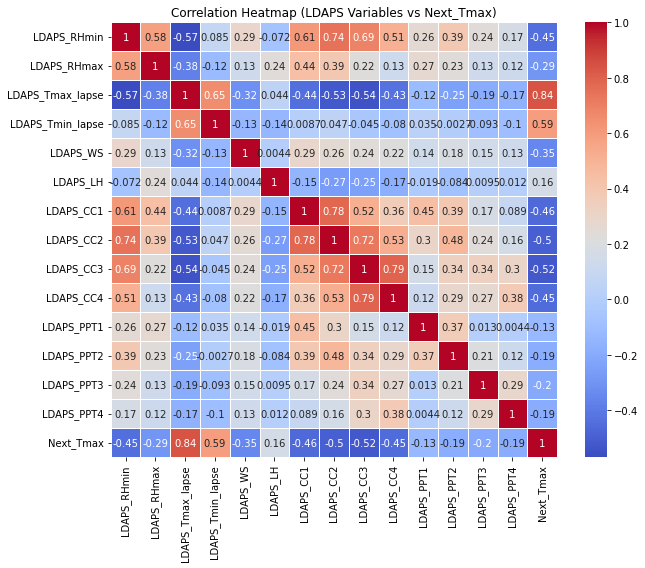

In [40]:

# Select LDAPS variables and Next_Tmax
ldaps_variables = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                   'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
target_variable = 'Next_Tmax'

# Calculate the correlation matrix
corr_matrix = df[ldaps_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (LDAPS Variables vs Next_Tmax)')
plt.show()


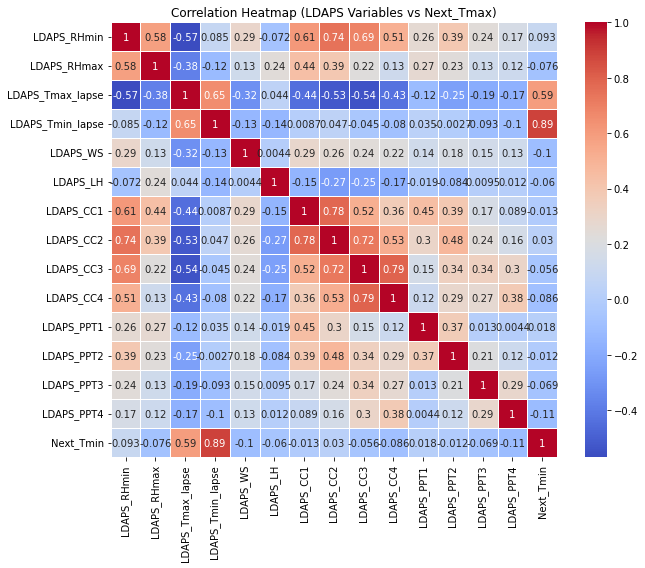

In [41]:

# Select LDAPS variables and Next_Tmax
ldaps_variables = ['LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                   'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
target_variable = 'Next_Tmin'

# Calculate the correlation matrix
corr_matrix = df[ldaps_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (LDAPS Variables vs Next_Tmax)')
plt.show()

In [11]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Extract 'Year', 'Month', and 'Day' as separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [12]:
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

In [11]:
X = df.drop(columns=['Next_Tmax','Next_Tmin'])
X

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


1. Comparison between Present Tmin to Next Tmin
2. Comparison between Present Tmax to Next Tmax


In [48]:
df['Date'] = df['Date'].astype(str)

from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)

# Fit the model and predict outliers
outliers = isolation_forest.fit_predict(df.drop(columns=['Date']))

outlier_indices = [i for i, pred in enumerate(outliers) if pred == -1]

df.iloc[outlier_indices]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
25,1.0,2013-01-07,28.3,21.2,72.798576,97.642792,25.276716,21.142562,15.608045,64.914946,...,9.933111,0.237004,0.848082,37.6046,126.991,212.3350,2.7850,5987.718750,24.8,18.7
29,5.0,2013-01-07,30.8,22.6,72.636543,94.365204,27.011573,23.104473,12.424396,105.303513,...,9.160582,0.258917,3.395696,37.5507,127.135,35.0380,0.5055,5854.146973,28.2,22.2
34,10.0,2013-01-07,30.0,21.1,68.921585,95.186226,25.393791,21.405047,13.526587,79.979037,...,5.555647,0.202442,2.291010,37.4562,126.955,208.5070,5.1782,5887.616211,27.5,20.7
36,12.0,2013-01-07,32.0,22.2,65.325424,91.729469,27.057580,22.259819,12.753207,78.853351,...,9.217301,0.269400,2.649244,37.5507,126.988,132.1180,0.5931,5918.901367,26.8,19.8
44,20.0,2013-01-07,30.5,23.2,76.487968,99.197578,25.697467,21.458316,18.043690,55.810112,...,10.076333,0.254713,1.371297,37.6181,127.004,146.5540,4.7296,5926.908691,27.3,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7725,1.0,2017-08-30,20.0,15.1,35.652172,89.973190,24.323737,16.128899,7.087329,108.981108,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4614.761230,23.8,15.1
7728,4.0,2017-08-30,22.6,16.7,38.991627,95.432045,24.562156,15.999018,5.608833,120.654731,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,4448.519043,26.9,17.0
7734,10.0,2017-08-30,21.4,14.1,25.229910,86.536469,25.878358,16.993471,6.542819,69.655613,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,4371.684570,26.2,15.0
7741,17.0,2017-08-30,22.6,14.6,35.059216,89.616730,26.112684,16.446214,5.147585,118.735384,...,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,4460.537109,26.8,12.9


In [49]:
# Get indices of non-outliers
non_outlier_indices = [i for i, pred in enumerate(outliers) if pred == 1]

# Filter the DataFrame to keep only non-outliers
df = df.iloc[non_outlier_indices]

In [50]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [52]:
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [54]:
df = df.drop(columns=['Date'])
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017,8,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017,8,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017,8,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017,8,30


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7208 non-null   float64
 1   Present_Tmax      7208 non-null   float64
 2   Present_Tmin      7208 non-null   float64
 3   LDAPS_RHmin       7208 non-null   float64
 4   LDAPS_RHmax       7208 non-null   float64
 5   LDAPS_Tmax_lapse  7208 non-null   float64
 6   LDAPS_Tmin_lapse  7208 non-null   float64
 7   LDAPS_WS          7208 non-null   float64
 8   LDAPS_LH          7208 non-null   float64
 9   LDAPS_CC1         7208 non-null   float64
 10  LDAPS_CC2         7208 non-null   float64
 11  LDAPS_CC3         7208 non-null   float64
 12  LDAPS_CC4         7208 non-null   float64
 13  LDAPS_PPT1        7208 non-null   float64
 14  LDAPS_PPT2        7208 non-null   float64
 15  LDAPS_PPT3        7208 non-null   float64
 16  LDAPS_PPT4        7208 non-null   float64


# For output = Next_Tmin. 
## Creating a new dataset for Next_Tmin , with all other min columns. 


In [60]:
next_tmin_columns = [col for col in df.columns if 'min' in col]

# Create a new DataFrame with only the 'Next_Tmin' and related columns
next_tmin_df = df[['station','Year','Month','Day','lat','lon','DEM','LDAPS_CC1','LDAPS_LH','LDAPS_WS','LDAPS_PPT1']  + next_tmin_columns]


In [62]:
next_tmin_df

,station,Year,Month,Day,lat,lon,DEM,LDAPS_CC1,LDAPS_LH,LDAPS_WS,LDAPS_PPT1,Present_Tmin,LDAPS_RHmin,LDAPS_Tmin_lapse,Next_Tmin
0,1.0,2013,6,30,37.6046,126.991,212.3350,0.233947,69.451805,6.818887,0.0,21.4,58.255688,23.006936,21.2
1,2.0,2013,6,30,37.6046,127.032,44.7624,0.225508,51.937448,5.691890,0.0,21.6,52.263397,24.035009,22.5
2,3.0,2013,6,30,37.5776,127.058,33.3068,0.209344,20.573050,6.138224,0.0,23.3,48.690479,24.565633,23.9
3,4.0,2013,6,30,37.6450,127.022,45.7160,0.216372,65.727144,5.650050,0.0,23.4,58.239788,23.326177,24.3
4,5.0,2013,6,30,37.5507,127.135,35.0380,0.151407,107.965535,5.735004,0.0,21.9,56.174095,23.486480,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017,8,30,37.5507,127.040,26.2980,0.052902,9.614074,6.603253,0.0,17.8,24.688997,18.303014,17.7
7746,22.0,2017,8,30,37.5102,127.086,21.9668,0.066461,82.146707,5.768083,0.0,17.4,30.094858,17.814038,17.1
7747,23.0,2017,8,30,37.5372,126.891,15.5876,0.030034,72.058294,6.148918,0.0,17.1,26.741310,18.775678,18.1
7748,24.0,2017,8,30,37.5237,126.909,17.2956,0.035874,47.241457,6.542819,0.0,17.7,24.040634,18.733519,18.8


In [63]:
X_min = next_tmin_df.drop(columns=['Next_Tmin'])
y_min = next_tmin_df['Next_Tmin']

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical columns
X_scaled_min = scaler.fit_transform(X_min)
X_scaled_min_df = pd.DataFrame(X_scaled_min, columns=X_min.columns)

In [78]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled_min_df, y_min, train_size=0.8, random_state=42)
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)  # X_train contains your feature data, and y_train contains the AveragePrice values

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the corresponding feature names
sorted_feature_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# Print or plot feature importances
for importance, feature_name in sorted_feature_importances:
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: LDAPS_Tmin_lapse, Importance: 0.7724058884868843
Feature: Present_Tmin, Importance: 0.05946297456342966
Feature: LDAPS_WS, Importance: 0.02359313461578139
Feature: LDAPS_CC1, Importance: 0.023280124996586188
Feature: LDAPS_RHmin, Importance: 0.020110266127030534
Feature: LDAPS_LH, Importance: 0.014949589220591522
Feature: lon, Importance: 0.013786852505779589
Feature: DEM, Importance: 0.013264339310998992
Feature: station, Importance: 0.010995041826418056
Feature: Day, Importance: 0.010524956215179428
Feature: lat, Importance: 0.010332043123516415
Feature: Month, Importance: 0.00948539172469697
Feature: LDAPS_PPT1, Importance: 0.009215479505040716
Feature: Year, Importance: 0.008593917778066205


Model: Linear Regression
Mean Squared Error: 1.07
R-squared: 0.82
----------------------------------------


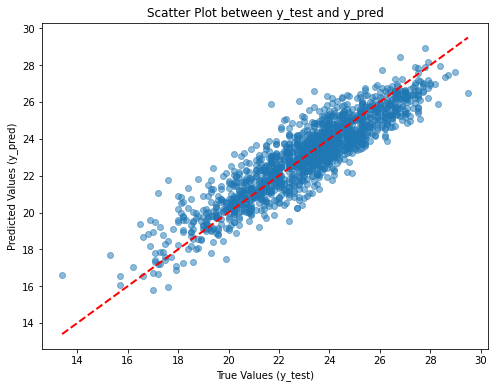

Model: Decision Tree Regressor
Mean Squared Error: 1.45
R-squared: 0.75
----------------------------------------


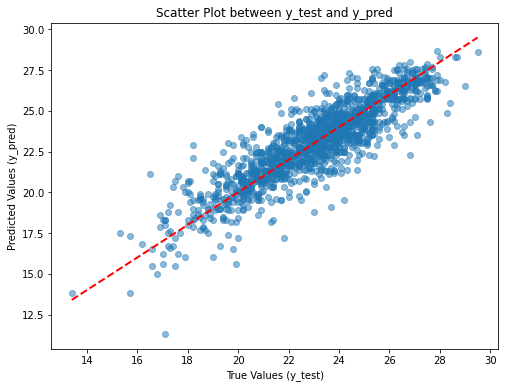

Model: Random Forest Regressor
Mean Squared Error: 0.73
R-squared: 0.88
----------------------------------------


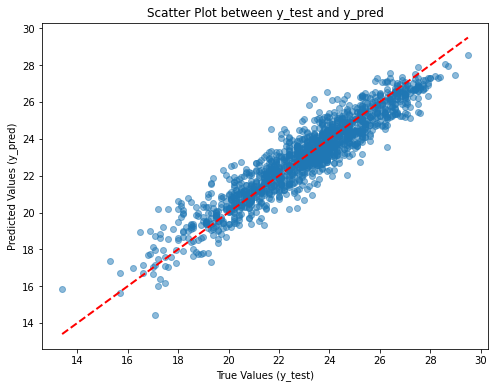

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

X_data_min = X_scaled_min_df.drop(columns=['Year','LDAPS_PPT1','Month','lat','Day','station'])
X_train, X_test, y_train, y_test = train_test_split(X_data_min, y_min, train_size=0.8, random_state=42)
# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]

# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))

# Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot


# Random Forest Regressor Stands out to be a better model.  
## Mean Squared Error: 0.73
## R-squared: 0.88

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data_min, y_min, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define a grid of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Metrics (with best hyperparameters):")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2): {r2_rf}")


## For Output = Next_Tmax

In [86]:
next_tmax_columns = [col for col in df.columns if 'max' in col]

# Create a new DataFrame with only the 'Next_Tmin' and related columns
next_tmax_df = df[['station','Year','Month','Day','lat','lon','DEM','LDAPS_CC4','LDAPS_LH','LDAPS_WS','LDAPS_PPT4']  + next_tmax_columns]


In [87]:
X_max = next_tmax_df.drop(columns=['Next_Tmax'])
y_max = next_tmax_df['Next_Tmax']

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the numerical columns
X_scaled_max = scaler.fit_transform(X_max)
X_scaled_max_df = pd.DataFrame(X_scaled_max, columns=X_max.columns)

In [89]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled_max_df, y_max, train_size=0.8, random_state=42)
# Instantiate the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)  # X_train contains your feature data, and y_train contains the AveragePrice values

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the corresponding feature names
sorted_feature_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# Print or plot feature importances
for importance, feature_name in sorted_feature_importances:
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: LDAPS_Tmax_lapse, Importance: 0.652810933404755
Feature: Present_Tmax, Importance: 0.08422880564133742
Feature: LDAPS_CC4, Importance: 0.054309985945923366
Feature: LDAPS_WS, Importance: 0.04698434002856268
Feature: LDAPS_LH, Importance: 0.027219793963005674
Feature: LDAPS_RHmax, Importance: 0.02539866002890169
Feature: Day, Importance: 0.02497272041893144
Feature: Month, Importance: 0.019134763610322736
Feature: Year, Importance: 0.018641074553716254
Feature: lon, Importance: 0.012405553938448392
Feature: station, Importance: 0.01099879341507106
Feature: DEM, Importance: 0.00851926587684513
Feature: LDAPS_PPT4, Importance: 0.00809401468244304
Feature: lat, Importance: 0.006281294491736111


Model: Linear Regression
Mean Squared Error: 2.39
R-squared: 0.73
----------------------------------------


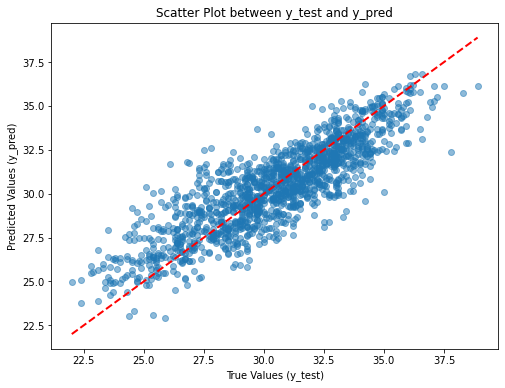

Model: Decision Tree Regressor
Mean Squared Error: 2.28
R-squared: 0.74
----------------------------------------


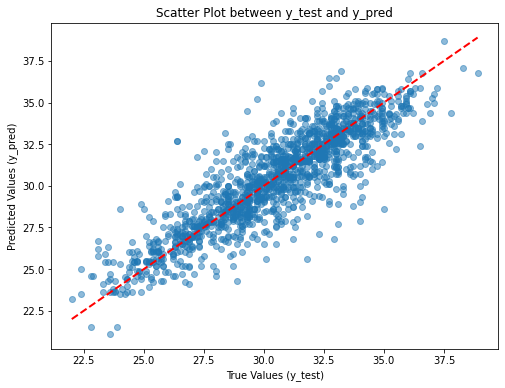

Model: Random Forest Regressor
Mean Squared Error: 1.17
R-squared: 0.87
----------------------------------------


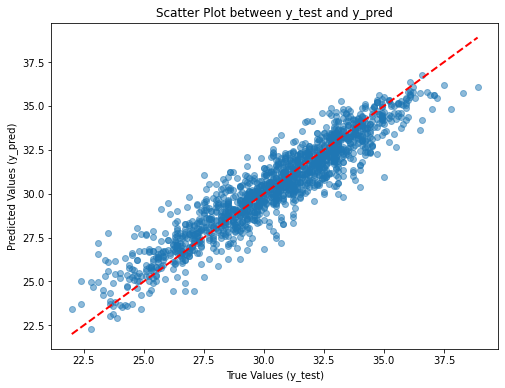

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

X_data_max = X_scaled_max_df.drop(columns=['lat','DEM','station','lon','LDAPS_PPT4'])
X_train, X_test, y_train, y_test = train_test_split(X_data_max, y_max, train_size=0.8, random_state=42)
# Step 2: Define a list of regression models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42))
]

# Step 3: Loop through the models, train, and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Print the results
    
    print(f"Model: {model_name}")
    
    print(f"Mean Squared Error: {mse:.2f}")
    
    print(f"R-squared: {r2:.2f}")
 
    print("-" * 40)
    
    # Initialize a scatter plot
    plt.figure(figsize=(8, 6))

# Scatter plot between y_pred and y_test
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Scatter Plot between y_test and y_pred")
    plt.xlabel("True Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()
# Show the plot


# Random Forest REgressor gives the best result with 87% accuracy. 